# Project_Team_ID:- PTID-CDS-MAY-23-1529

# Handwritten_Digits_Recognition_Code:-(PRCP 1002)
# Context:-
## MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
## Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

## Importing all the required Libraries:-

In [ ]:
!pip install tensorflow
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Handwritten Digits Dataset from MNIST :-

In [31]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() 

#### 'keras.datasets.mnist.load_data()': This function is used to load the MNIST dataset from the Keras library. MNIST is a dataset of handwritten digits, where X_train and X_test are arrays containing the images of the digits, and y_train and y_test are arrays containing the corresponding labels (the actual digit values). The training data (X_train and y_train) is used to train a machine learning model, and the test data (X_test and y_test) is used to evaluate the model's performance.

In [32]:
len(X_train) 

60000

#### 'len(X_train)' gives us the total number of training images in the MNIST dataset. This can be useful to understand the size of our training dataset or to iterate over the dataset for various purposes such as calculating accuracy or making predictions using a trained model.

In [33]:
len(X_test)

10000

In [34]:
X_train[0].shape 

(28, 28)

#### 'X_train[0].shape' is used to determine the shape of the first element in the X_train array. Here  the image is 28 pixels tall and 28 pixels wide, forming a 28x28 pixel grid.

In [35]:
X_train[0]



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### When we use X_train[0], we are accessing the pixel values of the first image in the training dataset. These pixel values represent the grayscale intensities of the individual pixels in the image. The pixel values can be used as input features for training a machine learning model to recognize and classify handwritten digits.

In [36]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### Each image in the X_train array is represented as a two-dimensional grid of pixel values, where the values indicate the grayscale intensity of each pixel. These pixel values serve as the input data that is fed into a machine learning algorithm to train a model. The goal is to teach the model to recognize and classify these handwritten digits correctly based on the pixel patterns.

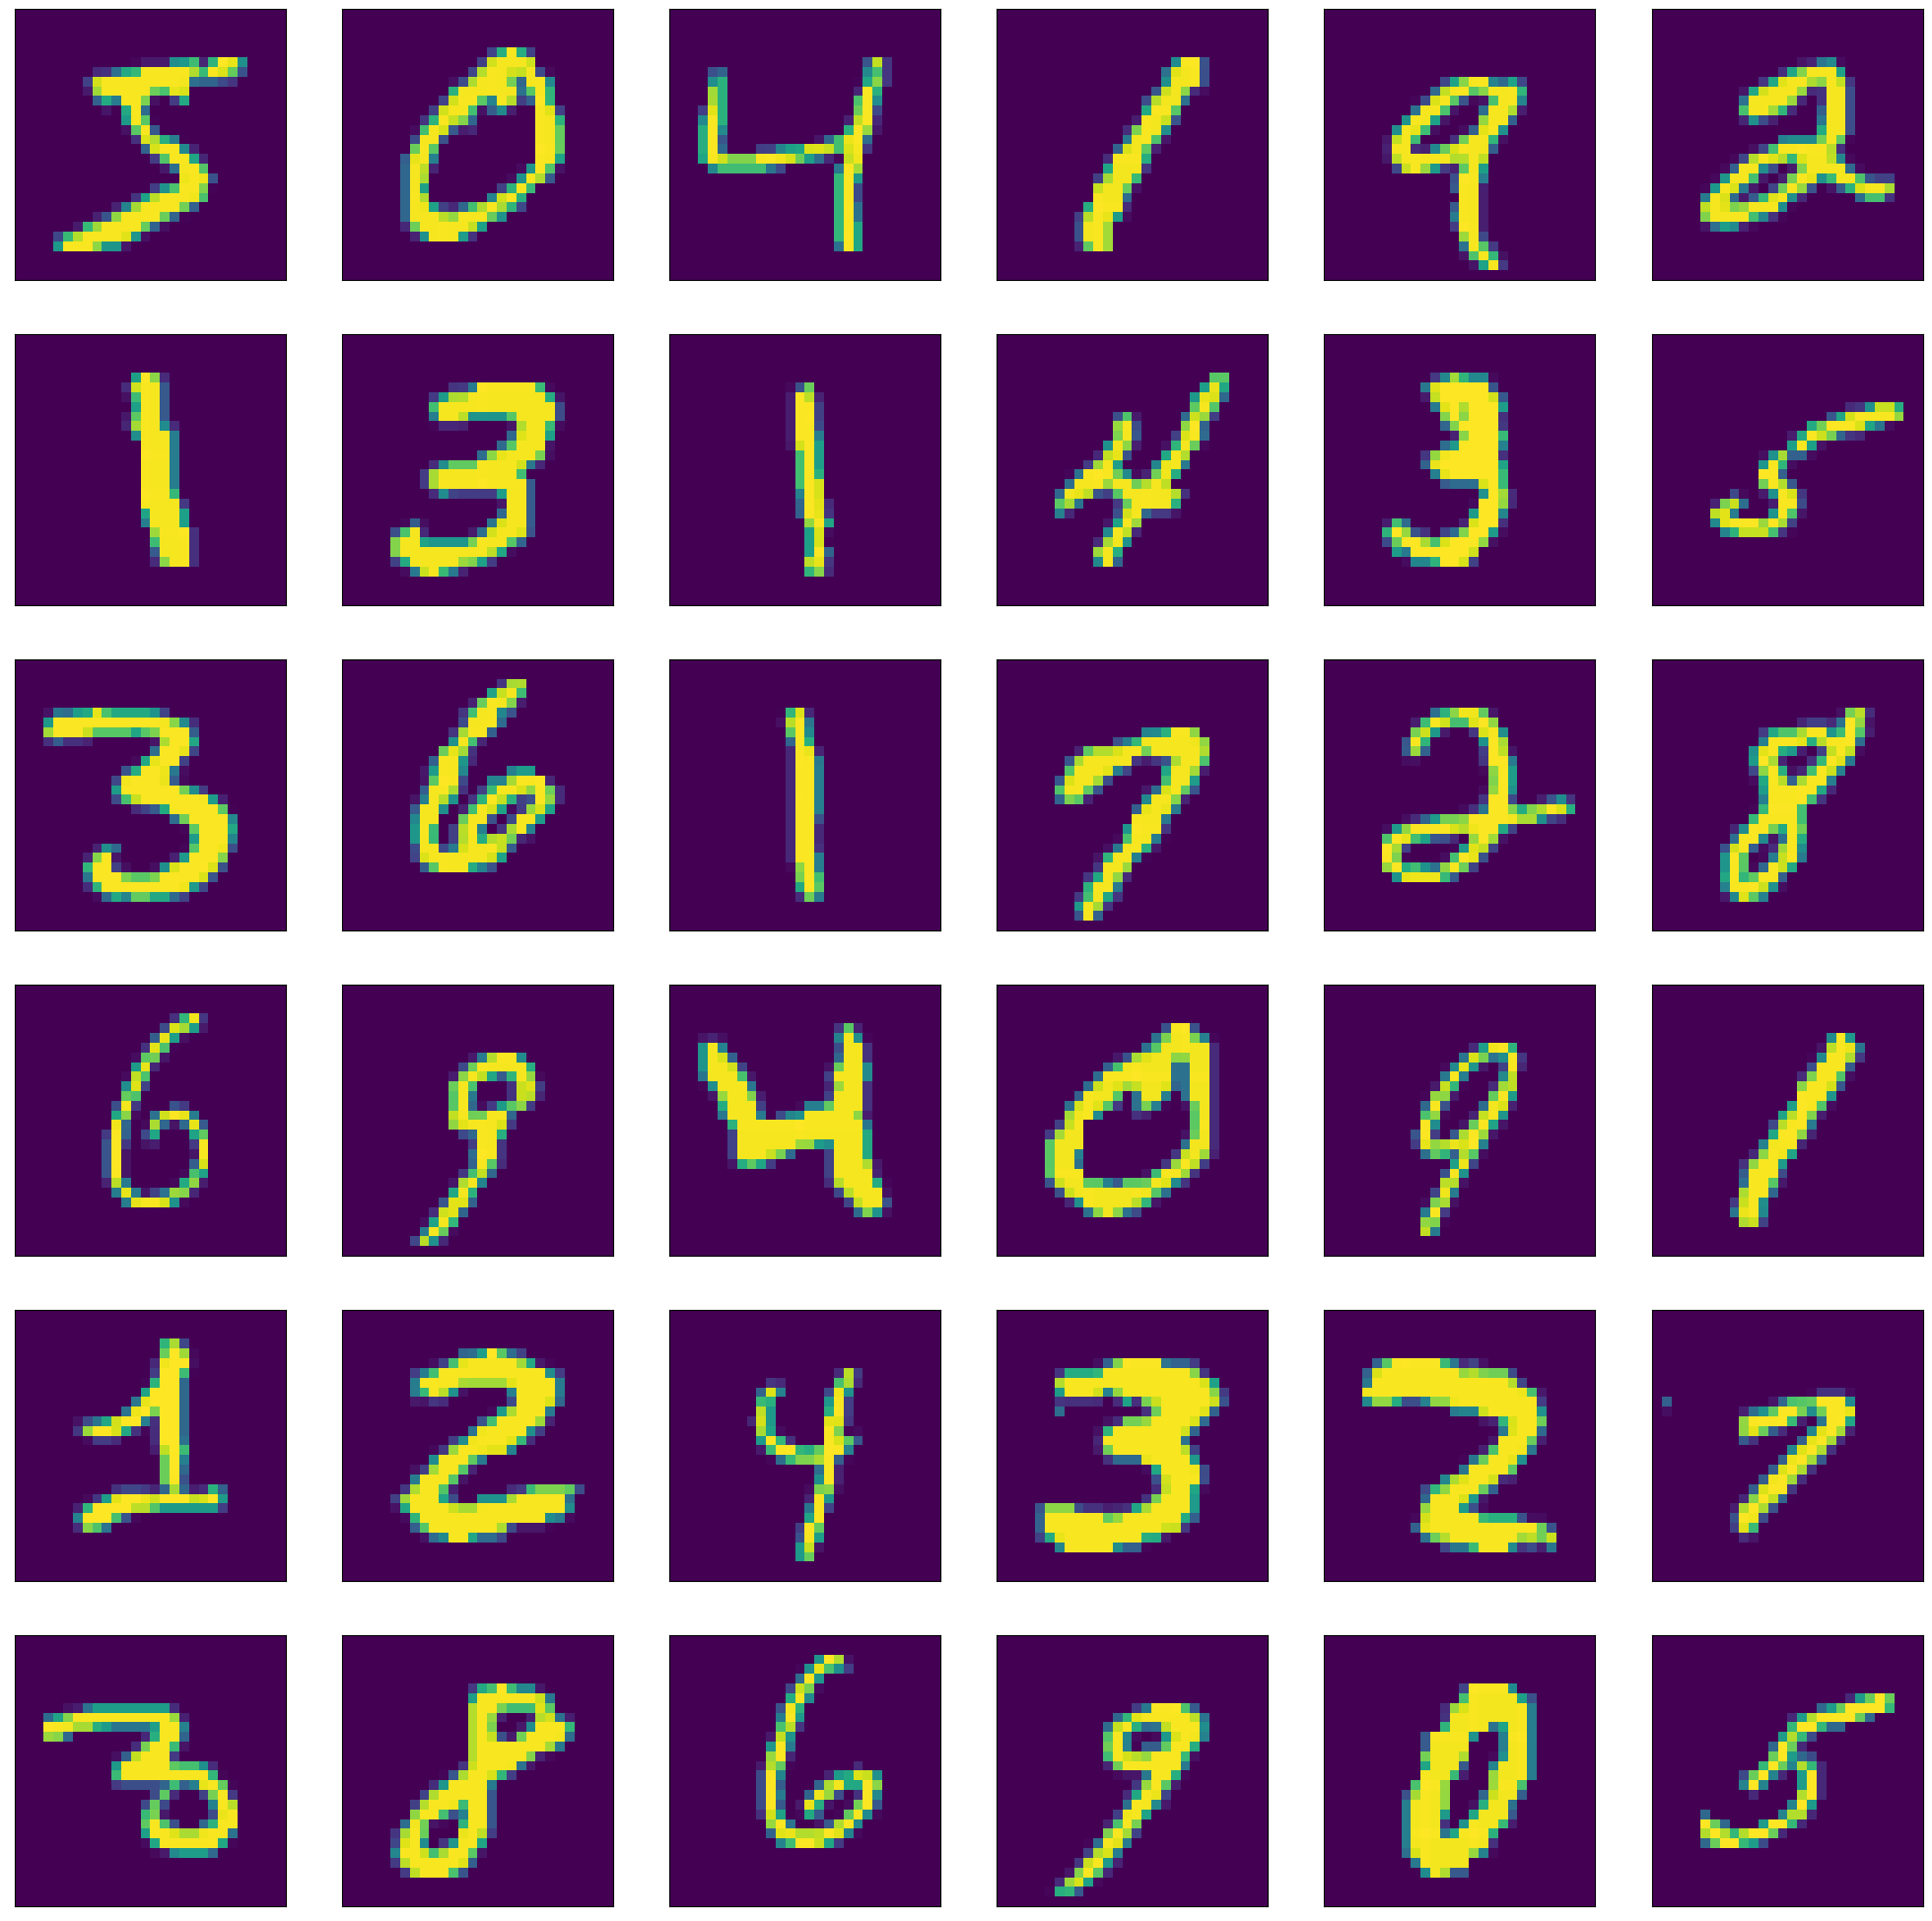

In [37]:
plt.figure(figsize=(25,25))
for i in range (36):
    ax = plt.subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

#### plt.figure(figsize=(25, 25)): This line creates a figure with a size of 25x25 inches, which will be used to display the grid of images.
#### The for loop iterates through a range of values from 0 to 35 (which corresponds to a grid of 6x6 images).
#### ax = plt.subplot(6, 6, i + 1, xticks=[], yticks=[]): This line creates individual subplots for each image. The 6, 6 argument indicates a 6x6 grid of subplots. The i + 1 argument specifies the current subplot index, and xticks=[] and yticks=[] remove the tick marks from the x and y axes.
#### ax.imshow(np.squeeze(X_train[i])): This line displays the image at index i from the X_train array. The np.squeeze() function is used to remove any single-dimensional entries from the shape of the array.

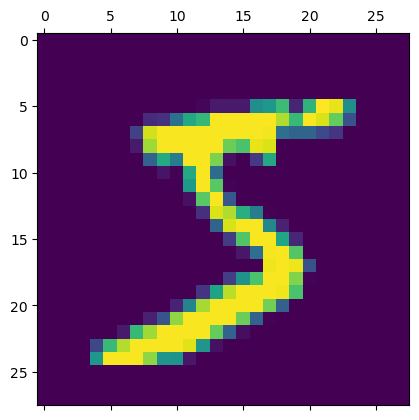

In [38]:
plt.matshow(X_train[0])

#### 'plt.matshow(X_train[0])' line uses the matshow function from Matplotlib to create a matrix plot (heatmap) of the pixel values in the first image from the X_train array. Each pixel's intensity is represented by a color, creating a visual representation of the grayscale image.

In [39]:
y_train[0]

5

#### It means that the first image in the training dataset is an image of the digit "5". 

In [40]:
X_train = X_train / 255
X_test = X_test / 255

#### This operation is dividing each pixel value in the image arrays by 255. This step is called normalization. By dividing by 255, all pixel values in the training and testing datasets are scaled down to the range of 0 to 1. In the original dataset, pixel values range from 0 (black) to 255 (white). Normalizing helps the machine learning model to work better during training by ensuring that the input values are within a manageable range.

In [41]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### This code retrieves the first normalized image in the training dataset. Each pixel value in the image represents a scaled-down grayscale intensity value within the range of 0 to 1.

In [42]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

#### '.reshape(len(X_train), 28*28)': This operation reshapes the images in the training dataset. The 'len(X_train)' argument indicates the number of images in the dataset, and 28*28 represents the total number of pixels in each image. This reshaping transforms each 2D image into a flattened 1D array, where all the pixel values are sequentially arranged.

#### Similarly, the X_test images are reshaped in the same way to have a flattened 1D format using '.reshape(len(X_test), 28*28)'.

#### The reason for reshaping the images to a flattened format is that many machine learning algorithms, like neural networks, require input data in a 1D format. Reshaping the images like this prepares the data for further processing and training.






In [43]:
X_train_flattened.shape

(60000, 784)

#### It means that the flattened training dataset contains 60,000 samples (images), and each image has 784(features) pixel values.

In [44]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### These values represent the normalized grayscale intensities of the pixels in the first image of the training dataset in a 1D format, arranged in a flattened manner.

## Training a Simple Neural Network with No Hidden Layers:-

In [45]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4709 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9250


### Creating the Model:

#### model = keras.Sequential([...]): This code creates a sequential neural network model. The model consists of a single layer:
#### keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'): This is a dense (fully connected) layer with 10 neurons, which corresponds to the number of classes (digits) in the MNIST dataset. The input_shape=(784,) specifies that the input data is flattened and has 784 features (pixels). The activation function used here is the sigmoid activation function.

### Compiling the Model:

#### model.compile(...): This line compiles the model by specifying its optimization method, loss function, and evaluation metrics.
#### optimizer='adam': The Adam optimizer is used for updating the model's weights during training.
#### loss='sparse_categorical_crossentropy': This is the loss function used for training. It is suitable for multi-class classification problems like MNIST.
#### metrics=['accuracy']: During training, the model's performance will be evaluated based on accuracy.

### Training the Model:

#### model.fit(X_train_flattened, y_train, epochs=5): This line trains the model using the flattened training data (X_train_flattened) and their corresponding labels (y_train). The epochs=5 parameter specifies that the training process will iterate over the dataset five times.

#### In summary, the above code builds a simple neural network model, compiles it, and trains it using the flattened training data from the MNIST dataset. The goal is to teach the model to recognize and classify handwritten digits.






In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.9259


[0.26559844613075256, 0.9258999824523926]

#### This code evaluates the trained neural network model's performance on the testing dataset.
####  The evaluation results include a loss value of 0.2 and an accuracy of 0.92, it means that the model has achieved a relatively low loss and a high accuracy when making predictions on the testing dataset.

In [47]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.7807692e-02, 5.0756682e-07, 6.5899268e-02, 9.6355194e-01,
       2.9156404e-03, 1.3752389e-01, 1.3283188e-06, 9.9976087e-01,
       1.1594107e-01, 6.4068502e-01], dtype=float32)

#### This code retrieves the predicted output for the first testing image. It contains the model's output values, typically representing the model's confidence scores for each class(digit).

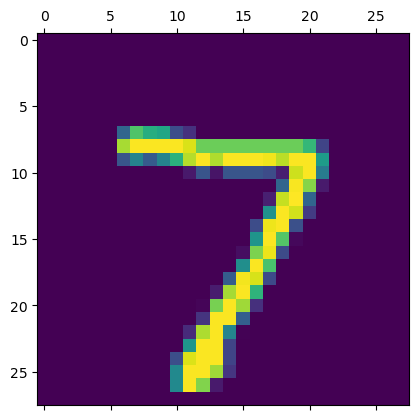

In [48]:
plt.matshow(X_test[0])

#### The above code uses the Matplotlib library to create a matrix plot (heatmap) of the pixel values in the first image from the testing dataset. Each pixel's intensity is represented by a color, creating a visual representation of the grayscale image.

In [49]:
np.argmax(y_predicted[0])

7

#### y_predicted[0]: This array contains the predicted output values for the first testing image, often representing the model's confidence scores for each class.

#### np.argmax(y_predicted[0]): This code uses NumPy's argmax function to find the index of the highest value in the array y_predicted[0]. This index corresponds to the predicted class that the model believes the first testing image belongs to.

#### The output 7 that the model predicts the first testing image to belong to the class (digit) "7". 

In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#### The above code iterates through each set of predicted output values in y_predicted. For each set of values, it uses the argmax function to find the index of the highest value, which corresponds to the predicted class. This code effectively generates a list of predicted class labels for all testing images.

In [51]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

#### The above code is used to display the first five predicted labels from the list of predicted labels for the testing images.

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    4,    2,    0,    9,    7,    2,    3,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  934,   16,    7,    2,   11,    9,   36,    5],
       [   1,    0,   19,  936,    0,   14,    2,   12,   21,    5],
       [   1,    1,    7,    2,  915,    0,    9,    4,   10,   33],
       [   7,    3,    6,   46,    8,  752,   14,    8,   42,    6],
       [   8,    3,    8,    1,    7,    6,  920,    2,    3,    0],
       [   1,    9,   23,    9,    8,    0,    0,  939,    5,   34],
       [   3,   12,    7,   24,    9,   17,    9,   11,  876,    6],
       [   8,    8,    2,   13,   23,    5,    0,   21,   11,  918]],
      dtype=int32)>

#### The abovecode is used to create a confusion matrix using TensorFlow's tf.math.confusion_matrix function. The confusion matrix helps in assessing the performance of a classification model by showing how many samples were classified correctly and incorrectly for each class. It can be helpful in assessing the model's performance and understanding which classes might be confused with each other.
#### 'labels=y_test': This argument represents the actual labels (ground truth) of the testing images.
#### 'predictions=y_predicted_labels': This argument represents the predicted labels generated by the model for the testing images.


Text(95.72222222222221, 0.5, 'Truth')

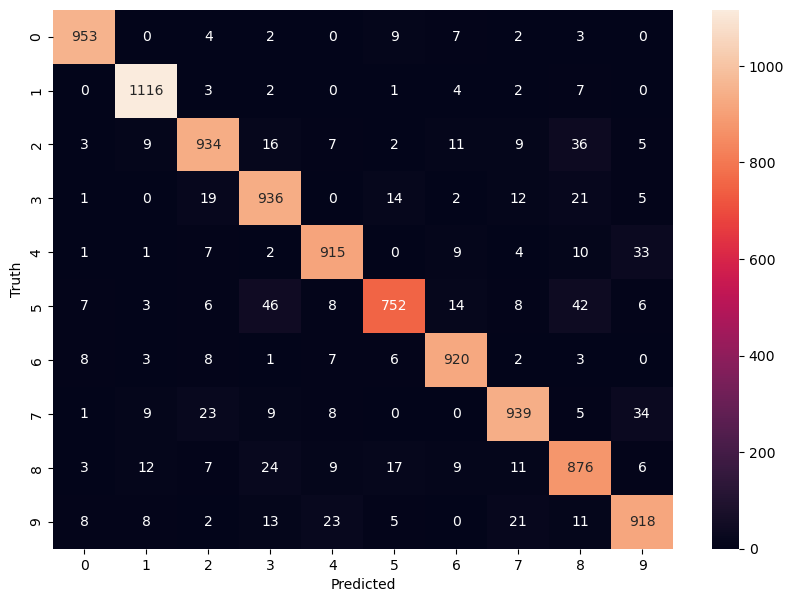

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### plt.figure(figsize=(10, 7)): This line creates a figure with a size of 10x7 inches to display the heatmap.

#### sn.heatmap(cm, annot=True, fmt='d'): This line uses Seaborn's heatmap function to create a heatmap using the confusion matrix cm. The annot=True parameter adds the actual values from the confusion matrix as annotations, and fmt='d' specifies that the annotations should be formatted as integers.
#### plt.xlabel('Predicted') and plt.ylabel('Truth'): These lines add labels to the x and y axes of the heatmap to indicate the predicted and truth (ground truth) classes, respectively.
#### The heatmap helps visualize the distribution of correct and incorrect predictions across different classes, making it easier to assess the model's performance.

##  Training a Neural Network Model with Two Hidden Layers:-

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1207 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9844


### Creating the Model:

#### model = keras.Sequential([...]): This code creates a sequential neural network model. The model consists of two layers:
#### keras.layers.Dense(100, input_shape=(784,), activation='relu'): This is the first hidden layer with 100 neurons. The input_shape=(784,) specifies that the input data is flattened and has 784 features (pixels). The activation function used here is the Rectified Linear Unit (ReLU), which helps introduce non-linearity.
#### keras.layers.Dense(10, activation='sigmoid'): This is the output layer with 10 neurons, which corresponds to the number of classes (digits) in the MNIST dataset. The activation function used here is the sigmoid activation function.

### Compiling the Model:

#### model.compile(...): This line compiles the model by specifying its optimization method, loss function, and evaluation metrics.
#### optimizer='adam': The Adam optimizer is used for updating the model's weights during training.
#### loss='sparse_categorical_crossentropy': This is the loss function used for training. It is suitable for multi-class classification problems like MNIST.
#### metrics=['accuracy']: During training, the model's performance will be evaluated based on accuracy.

### Training the Model:

#### model.fit(X_train_flattened, y_train, epochs=5): This line trains the model using the flattened training data (X_train_flattened) and their corresponding labels (y_train). The epochs=5 parameter specifies that the training process will iterate over the dataset five times.

In [55]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9751


[0.08109291642904282, 0.9750999808311462]

#### The evaluation results include a loss value of 0.08 and an accuracy of 0.97, it means that the model achieved a relatively low loss and a high accuracy when making predictions on the testing dataset. The evaluate function provides insights into how well the model performs on the testing dataset.

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

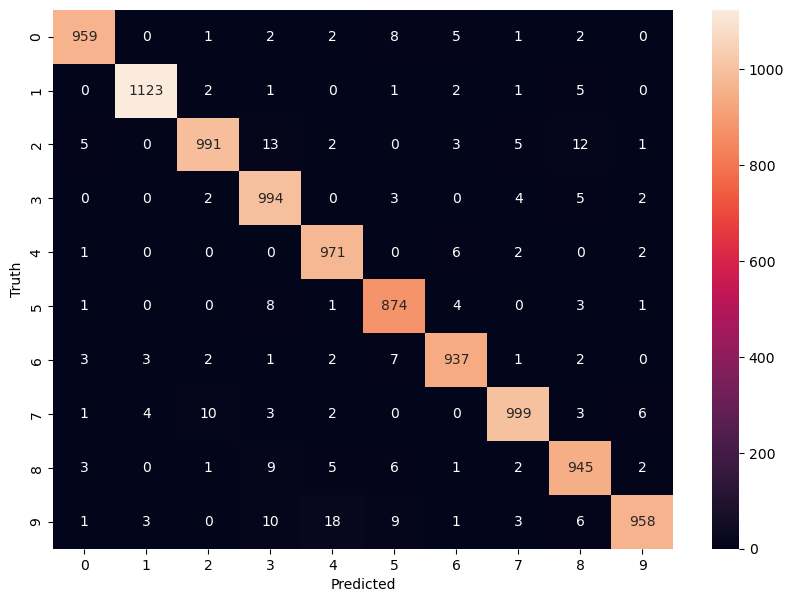

In [56]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### The above code predicts labels using the trained model, creates a confusion matrix, and visualizes it using a heatmap created with Seaborn. The heatmap helps visualize the distribution of correct and incorrect predictions across different classes, making it easier to assess the model's performance.

## Training a Neural Network Model Using Flatten Layer:-

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2778 - accuracy: 0.9211
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1272 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

### Creating the Model:

#### model = keras.Sequential([...]): This code creates a sequential neural network model. The model consists of three layers:
#### keras.layers.Flatten(input_shape=(28, 28)): This layer flattens the 2D input images (28x28 pixels) into a 1D array (784 pixels).
#### keras.layers.Dense(100, activation='relu'): This is a hidden dense layer with 100 neurons and ReLU activation function.
#### keras.layers.Dense(10, activation='sigmoid'): This is the output layer with 10 neurons, which corresponds to the number of classes (digits) in the MNIST dataset. The activation function used here is the sigmoid activation function.

### Compiling the Model:

#### model.compile(...): This line compiles the model by specifying its optimization method, loss function, and evaluation metrics.
#### optimizer='adam': The Adam optimizer is used for updating the model's weights during training.
#### loss='sparse_categorical_crossentropy': This is the loss function used for training. It is suitable for multi-class classification problems like MNIST.
#### metrics=['accuracy']: During training, the model's performance will be evaluated based on accuracy.

### Training the Model:

#### model.fit(X_train, y_train, epochs=10): This line trains the model using the training data (X_train) and their corresponding labels (y_train). The epochs=10 parameter specifies that the training process will iterate over the dataset ten times.

In [58]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9774


[0.08542857319116592, 0.977400004863739]

#### The evaluation results include a loss value of 0.08 and an accuracy of 0.97, it means that the model has achieved a relatively low loss and a high accuracy when making predictions on the testing dataset.

## Conclusion:-

 ### With this we can conclude that with the increase in hidden layers,the accuracy went up to 97.74%
 ### So, training a Neural network model using a Flatten layer is the best model of our Project.
 ### The conclusion from the above project is that a neural network model, specifically designed for classifying handwritten digits from the MNIST dataset, has been successfully created, trained, and evaluated. 
 
 ### Outcome:- The project's outcome indicates the model's effectiveness in classifying handwritten digits. The accuracy achieved on the testing dataset is a measure of its performance. Additionally, the confusion matrix helps understand the types of errors the model might make, such as confusing certain digits more often than others.

### In summary, the project demonstrated the process of building, training, and evaluating a neural network model for digit classification. It showcased how neural networks can learn to recognize and classify patterns in image data. The success of the model's accuracy and the insights from the confusion matrix contribute to the understanding of its performance and potential areas for improvement.
 